## Pie Chart

matplotlib.pyplot.pie <i>(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=None, data=None)

In [1]:
# Basic Library
import numpy as np
import pandas as pd

# Libraries for Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings;
warnings.filterwarnings('ignore')

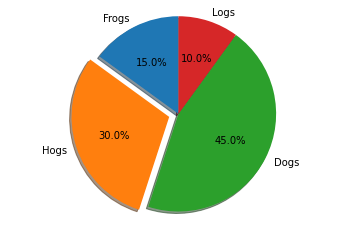

In [2]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [3]:
df = pd.read_csv('../Data/Final_Four 2020-2021.csv')

In [4]:
df

,Player,Club,Number,Position,Country,Age,Height,Games,Minutes,Points,Rebounds,Assists,Steals,Turnovers,Blocks
0,Adam Hanga,FC Barcelona,8,Forward,Hungary,31,200,41,652,190,90,69,32,48,11
1,Adrien Moerman,Anadolu Efes,18,Forward,France,32,202,41,841,263,189,45,24,39,6
2,Alex Abrines,FC Barcelona,21,Forward,Spain,27,198,39,730,237,72,26,22,13,8
3,Alexander Khomenko,CSKA Moscow,4,Guard,Russia,21,192,16,100,32,4,4,0,8,0
4,Andrea Cinciarini,AX Armani Exchange Milan,20,Guard,Italy,34,193,8,19,0,2,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Vladimir Micov,AX Armani Exchange Milan,5,Forward,Serbia,35,201,30,573,184,47,30,19,26,2
62,Victor Claver,FC Barcelona,30,Forward,Spain,32,208,15,190,34,28,4,6,6,2
63,Will Clyburn,CSKA Moscow,21,Forward,USA,30,201,31,815,434,117,48,24,49,6
64,Yigitcan Saybir,Anadolu Efes,3,Forward,Turkey,21,203,2,5,2,1,0,0,0,0


In [5]:
values = df['Position'].value_counts()
labels = df['Position'].value_counts().index

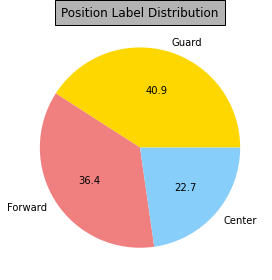

In [6]:
plt.figure(figsize=(4,4))

colors_list = ['gold', 'lightcoral', 'lightskyblue']

plt.pie(values, labels=labels, autopct='%.1f', colors=colors_list)

plt.title('Position Label Distribution', bbox={'facecolor': '0.7', 'pad': 6})
plt.tight_layout()
plt.show()

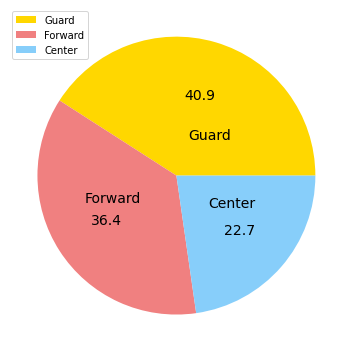

In [7]:
plt.figure(figsize=(5,5))

colors_list = ['gold', 'lightcoral', 'lightskyblue']

plt.axis("equal")
plt.pie(values, labels=labels, labeldistance= 0.30, autopct='%.1f', colors=colors_list, textprops={'fontsize': 14})

plt.tight_layout()
plt.legend(loc='upper left')
plt.show()

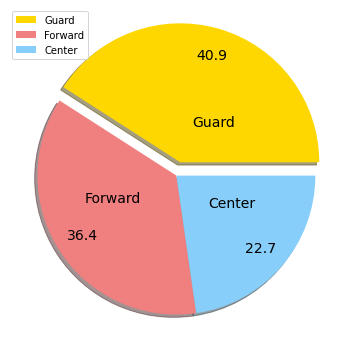

In [8]:
plt.figure(figsize=(5,5))

colors_list = ['gold', 'lightcoral', 'lightskyblue']

plt.axis("equal")
plt.pie(values, labels=labels, labeldistance= 0.30, autopct='%.1f', colors=colors_list, 
        textprops={'fontsize': 14}, pctdistance=0.8, shadow=True, explode=[0.1,0,0])

plt.tight_layout()
plt.legend(loc='upper left')
plt.show()

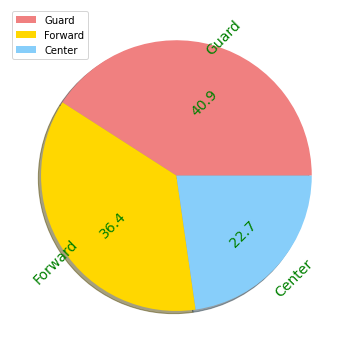

In [9]:
plt.figure(figsize=(5,5))

colors_list = ['lightcoral', 'gold', 'lightskyblue']

textprops = dict(horizontalalignment="center",
                 verticalalignment="top",
                 rotation=45,
                 rotation_mode="anchor",
                 size=14, color="green")

plt.pie(values, labels=labels, autopct='%.1f', colors=colors_list, textprops=textprops, shadow=True)
plt.tight_layout()
plt.legend(loc='upper left')
    
plt.show()

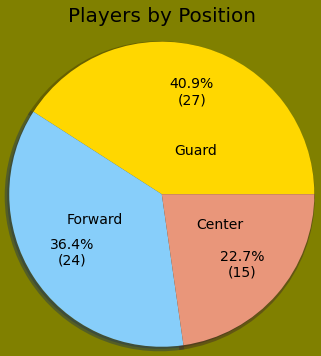

In [10]:
plt.figure(figsize=(5,5), facecolor='olive')

guard, forward, center = df[df['Position'] == 'Guard'], df[df['Position'] == 'Forward'], df[df['Position'] == 'Center']

def num_of_plyers(x):
    return '{:.1f}%\n({:.0f})'.format(x, total*x/100)

labels = ["Guard", "Forward", "Center"]
size = [len(guard), len(forward), len(center)]
total = df['Player'].count()

plt.pie(size, labels=labels, labeldistance= 0.30, radius=1.5, textprops={'fontsize': 14}, wedgeprops={'linewidth': 5},
        colors=['gold','lightskyblue','darksalmon'], autopct=num_of_plyers, pctdistance=0.70, shadow=True)

plt.suptitle("Players by Position", size=20)

plt.tight_layout()
plt.show()

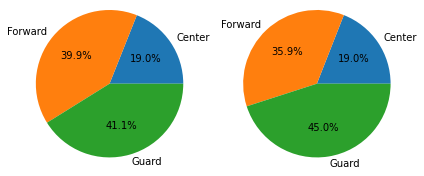

In [11]:
size1 = df.groupby('Position').Minutes.sum()
size2 = df.groupby('Position').Points.sum()

label1 = df.groupby('Position').Minutes.sum().index
label2 = df.groupby('Position').Points.sum().index

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2)

# plot each pie chart in a separate subplot
ax1.pie(size1, labels=label1, autopct='%0.1f%%', radius=1.2) # default radius value is 1
ax2.pie(size2, labels=label2, autopct='%0.1f%%', radius=1.2)

plt.tight_layout()
plt.show()

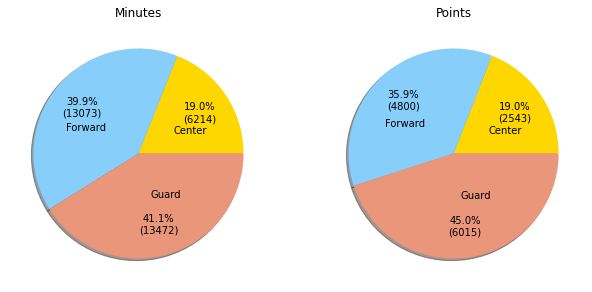

In [12]:
fig = plt.figure(figsize=(16,8))

def min_per_pos(x):
    return '{:.1f}%\n({:.0f})'.format(x, total1*x/100)

def pts_per_pos(x):
    return '{:.1f}%\n({:.0f})'.format(x, total2*x/100)

size1 = df.groupby('Position').Minutes.sum()
size2 = df.groupby('Position').Points.sum()

label1 = df.groupby('Position').Minutes.sum().index
label2 = df.groupby('Position').Points.sum().index

total1 = df.Minutes.sum()
total2 = df.Points.sum()

# Minutes
plt.subplot(1,3,1)
plt.pie(size1, labels=label1, labeldistance= 0.40, textprops={'fontsize': 10},
        colors=['gold','lightskyblue','darksalmon'], autopct=min_per_pos, pctdistance=0.70, shadow=True)
plt.title('Minutes')

# Points
plt.subplot(1,3,2)
plt.pie(size2, labels=label2, labeldistance= 0.40, textprops={'fontsize': 10},
        colors=['gold','lightskyblue','darksalmon'], autopct=pts_per_pos, pctdistance=0.70, shadow=True)
plt.title('Points')

plt.show()